In [1]:
import pandas as pd
import numpy as np

In [2]:
df_bikeShare = pd.read_csv('bikeshare-dataset-2020.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#how many rows (instances)? How many columns (variables)? Describe each of the variables
df_bikeShare.shape[0]

2911309

In [4]:
df_bikeShare.columns

Index(['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type'],
      dtype='object')

In [5]:
print (df_bikeShare.dtypes)

Trip Id                object
Trip  Duration        float64
Start Station Id       object
Start Time             object
Start Station Name     object
End Station Id         object
End Time               object
End Station Name       object
Bike Id                object
User Type              object
dtype: object


In [6]:
df_bikeShare.nunique()

Trip Id               2911309
Trip  Duration          19947
Start Station Id         1464
Start Time             395679
Start Station Name        679
End Station Id           1465
End Time               395545
End Station Name          700
Bike Id                 12802
User Type                   2
dtype: int64

In [7]:
#How many of the rows contain NA?
df_bikeShare.isnull().sum()

Trip Id                  0
Trip  Duration           1
Start Station Id         1
Start Time               1
Start Station Name     794
End Station Id        1302
End Time                 1
End Station Name      2050
Bike Id                 74
User Type              250
dtype: int64

In [8]:
#small percentage of rows with NA (3142/2911309 rows) - decided to drop all rows with NA
df_bikeShare.dropna(axis='rows', how='any', inplace=False)

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,7334128,648.0,7003,01/01/2020 00:08,Madison Ave / Bloor St W,7271,01/01/2020 00:19,Yonge St / Alexander St - SMART,3104,Annual Member
1,7334129,419.0,7007,01/01/2020 00:10,College St / Huron St,7163,01/01/2020 00:17,Yonge St / Wood St,2126,Annual Member
2,7334130,566.0,7113,01/01/2020 00:13,Parliament St / Aberdeen Ave,7108,01/01/2020 00:22,Front St E / Cherry St,4425,Annual Member
3,7334131,1274.0,7333,01/01/2020 00:17,King St E / Victoria St,7311,01/01/2020 00:38,Sherbourne St / Isabella St,4233,Annual Member
4,7334132,906.0,7009,01/01/2020 00:19,King St E / Jarvis St,7004,01/01/2020 00:34,University Ave / Elm St,2341,Casual Member
...,...,...,...,...,...,...,...,...,...,...
2911303,10644213,330.0,7010,12/31/2020 23:52,King St W / Spadina Ave,7216,12/31/2020 23:57,Wellington St W / Stafford St,3458,Annual Member
2911304,10644214,216.0,7288,12/31/2020 23:54,Humber Bay Shores Park West,7514,12/31/2020 23:58,Humber Bay Shores Park / Marine Parade Dr,4085,Annual Member
2911305,10644215,204.0,7288,12/31/2020 23:54,Humber Bay Shores Park West,7514,12/31/2020 23:58,Humber Bay Shores Park / Marine Parade Dr,3580,Annual Member
2911306,10644216,1659.0,7270,12/31/2020 23:56,Church St / Dundas St E - SMART,7270,01/01/2021 00:24,Church St / Dundas St E - SMART,5137,Annual Member


In [9]:
#drop columns not planning to use
df_bikeShare = df_bikeShare.drop(['Trip  Duration', 'End Station Name', 'Start Station Id', 'Trip Id', 'End Time', 'Bike Id', 'User Type', 'End Station Id'], axis = 1)

In [10]:
#looking to create models for the most popular start stations, group by start station name and find top 5 most common start station names
grouped = df_bikeShare.groupby(['Start Station Name']).size()
grouped.sort_values(ascending=False).head(5)

Start Station Name
Queens Quay E / Lower Sherbourne St    30977
Lake Shore Blvd W / Ontario Dr         30481
Marilyn Bell Park Tennis Court         26586
HTO Park (Queens Quay W)               26145
York St / Queens Quay W                25751
dtype: int64

In [11]:
#create a new data frame with only the top 5 stations from the 2020 the dataset
df1 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'Queens Quay E / Lower Sherbourne St']
df2 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'Lake Shore Blvd W / Ontario Dr']
df3 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'Marilyn Bell Park Tennis Court']
df4 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'HTO Park (Queens Quay W)']
df5 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'York St / Queens Quay W']

In [12]:
df_bikeShareTop5 = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [13]:
df_bikeShareTop5.shape[0]

139940

In [14]:
df_bikeShareTop5

,Start Time,Start Station Name
245,01/01/2020 09:12,Queens Quay E / Lower Sherbourne St
246,01/01/2020 09:13,Queens Quay E / Lower Sherbourne St
376,01/01/2020 11:43,Queens Quay E / Lower Sherbourne St
393,01/01/2020 11:58,Queens Quay E / Lower Sherbourne St
408,01/01/2020 12:08,Queens Quay E / Lower Sherbourne St
...,...,...
2910563,12/31/2020 17:45,York St / Queens Quay W
2911073,12/31/2020 20:56,York St / Queens Quay W
2911193,12/31/2020 22:05,York St / Queens Quay W
2911220,12/31/2020 22:23,York St / Queens Quay W


In [15]:
#From Start Time column, pull out day, month, and time columns
df = pd.DataFrame(df_bikeShareTop5)

In [16]:
#convert data type (object) to date time 
from datetime import datetime
df['Start Time'] =  pd.to_datetime(df['Start Time'], errors='coerce', format="%m/%d/%Y %H:%M")

In [17]:
df['Start Day'] = df['Start Time'].dt.day
df['Start Month'] = df['Start Time'].dt.month

In [18]:
df['New Start time'] = df['Start Time'].dt.time

In [19]:
df

,Start Time,Start Station Name,Start Day,Start Month,New Start time
245,2020-01-01 09:12:00,Queens Quay E / Lower Sherbourne St,1,1,09:12:00
246,2020-01-01 09:13:00,Queens Quay E / Lower Sherbourne St,1,1,09:13:00
376,2020-01-01 11:43:00,Queens Quay E / Lower Sherbourne St,1,1,11:43:00
393,2020-01-01 11:58:00,Queens Quay E / Lower Sherbourne St,1,1,11:58:00
408,2020-01-01 12:08:00,Queens Quay E / Lower Sherbourne St,1,1,12:08:00
...,...,...,...,...,...
2910563,2020-12-31 17:45:00,York St / Queens Quay W,31,12,17:45:00
2911073,2020-12-31 20:56:00,York St / Queens Quay W,31,12,20:56:00
2911193,2020-12-31 22:05:00,York St / Queens Quay W,31,12,22:05:00
2911220,2020-12-31 22:23:00,York St / Queens Quay W,31,12,22:23:00


In [20]:
# Create the day of week variable
from datetime import datetime
import calendar

In [21]:
df['Date'] = pd.to_datetime(df['Start Time']).dt.date

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d").dt.strftime("%m/%d/%Y")

In [23]:
df['Date'] =  pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [24]:
df['Day of Week'] = df['Date'].dt.dayofweek

In [25]:
print(df['Day of Week'])

245        2
246        2
376        2
393        2
408        2
          ..
2910563    3
2911073    3
2911193    3
2911220    3
2911221    3
Name: Day of Week, Length: 139940, dtype: int64


In [26]:
#add temperature and precipitation variables
weather = pd.read_csv('Toronto Weather 2020.csv')

In [27]:
weather.rename(columns={'Date/Time': 'Date'}, inplace=True)

In [28]:
weather

,Station Name,Date,Year,Month,Day,Mean Temp (°C),Total Precip (mm)
0,TORONTO CITY,1/1/2020,2020,1,1,-0.1,0.2
1,TORONTO CITY,1/2/2020,2020,1,2,3.6,0.0
2,TORONTO CITY,1/3/2020,2020,1,3,5.7,0.0
3,TORONTO CITY,1/4/2020,2020,1,4,2.0,1.5
4,TORONTO CITY,1/5/2020,2020,1,5,0.3,5.6
...,...,...,...,...,...,...,...
361,TORONTO CITY,12/27/2020,2020,12,27,1.1,0.5
362,TORONTO CITY,12/28/2020,2020,12,28,1.7,3.4
363,TORONTO CITY,12/29/2020,2020,12,29,-2.3,0.0
364,TORONTO CITY,12/30/2020,2020,12,30,1.7,5.9


In [29]:
weather['Date'] =  pd.to_datetime(weather['Date'], format="%m/%d/%Y")

In [30]:
#add weather to main dataset
bikeShareWeather = pd.merge(df, weather, on = "Date")

In [31]:
bikeShareWeather

,Start Time,Start Station Name,Start Day,Start Month,New Start time,Date,Day of Week,Station Name,Year,Month,Day,Mean Temp (°C),Total Precip (mm)
0,2020-01-01 09:12:00,Queens Quay E / Lower Sherbourne St,1,1,09:12:00,2020-01-01,2,TORONTO CITY,2020,1,1,-0.1,0.2
1,2020-01-01 09:13:00,Queens Quay E / Lower Sherbourne St,1,1,09:13:00,2020-01-01,2,TORONTO CITY,2020,1,1,-0.1,0.2
2,2020-01-01 11:43:00,Queens Quay E / Lower Sherbourne St,1,1,11:43:00,2020-01-01,2,TORONTO CITY,2020,1,1,-0.1,0.2
3,2020-01-01 11:58:00,Queens Quay E / Lower Sherbourne St,1,1,11:58:00,2020-01-01,2,TORONTO CITY,2020,1,1,-0.1,0.2
4,2020-01-01 12:08:00,Queens Quay E / Lower Sherbourne St,1,1,12:08:00,2020-01-01,2,TORONTO CITY,2020,1,1,-0.1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139935,2020-12-31 17:45:00,York St / Queens Quay W,31,12,17:45:00,2020-12-31,3,TORONTO CITY,2020,12,31,0.7,0.0
139936,2020-12-31 20:56:00,York St / Queens Quay W,31,12,20:56:00,2020-12-31,3,TORONTO CITY,2020,12,31,0.7,0.0
139937,2020-12-31 22:05:00,York St / Queens Quay W,31,12,22:05:00,2020-12-31,3,TORONTO CITY,2020,12,31,0.7,0.0
139938,2020-12-31 22:23:00,York St / Queens Quay W,31,12,22:23:00,2020-12-31,3,TORONTO CITY,2020,12,31,0.7,0.0


In [32]:
bikeShareWeather = bikeShareWeather.drop(['Start Month', 'Date', 'Start Day', 'Station Name', 'Year'], axis = 1)

In [33]:
bikeShareWeather

,Start Time,Start Station Name,New Start time,Day of Week,Month,Day,Mean Temp (°C),Total Precip (mm)
0,2020-01-01 09:12:00,Queens Quay E / Lower Sherbourne St,09:12:00,2,1,1,-0.1,0.2
1,2020-01-01 09:13:00,Queens Quay E / Lower Sherbourne St,09:13:00,2,1,1,-0.1,0.2
2,2020-01-01 11:43:00,Queens Quay E / Lower Sherbourne St,11:43:00,2,1,1,-0.1,0.2
3,2020-01-01 11:58:00,Queens Quay E / Lower Sherbourne St,11:58:00,2,1,1,-0.1,0.2
4,2020-01-01 12:08:00,Queens Quay E / Lower Sherbourne St,12:08:00,2,1,1,-0.1,0.2
...,...,...,...,...,...,...,...,...
139935,2020-12-31 17:45:00,York St / Queens Quay W,17:45:00,3,12,31,0.7,0.0
139936,2020-12-31 20:56:00,York St / Queens Quay W,20:56:00,3,12,31,0.7,0.0
139937,2020-12-31 22:05:00,York St / Queens Quay W,22:05:00,3,12,31,0.7,0.0
139938,2020-12-31 22:23:00,York St / Queens Quay W,22:23:00,3,12,31,0.7,0.0


In [34]:
#group rides by start date and time (hour) ('Start Time') and Start Station and create a 'Ride Count' column
bikeShareCount = bikeShareWeather.groupby(['Start Time', 'Start Station Name']).size().reset_index(name='Ride Count')

In [35]:
bikeShareCount

,Start Time,Start Station Name,Ride Count
0,2020-01-01 01:08:00,HTO Park (Queens Quay W),1
1,2020-01-01 08:26:00,HTO Park (Queens Quay W),2
2,2020-01-01 08:57:00,York St / Queens Quay W,1
3,2020-01-01 08:58:00,York St / Queens Quay W,1
4,2020-01-01 09:05:00,York St / Queens Quay W,2
...,...,...,...
106437,2020-12-31 17:45:00,York St / Queens Quay W,1
106438,2020-12-31 19:50:00,Queens Quay E / Lower Sherbourne St,1
106439,2020-12-31 20:56:00,York St / Queens Quay W,1
106440,2020-12-31 22:05:00,York St / Queens Quay W,1


In [36]:
bikeShareNew = pd.merge(bikeShareCount, bikeShareWeather, how = 'left', on = ['Start Time', 'Start Station Name'])

In [37]:
bikeShareNew

,Start Time,Start Station Name,Ride Count,New Start time,Day of Week,Month,Day,Mean Temp (°C),Total Precip (mm)
0,2020-01-01 01:08:00,HTO Park (Queens Quay W),1,01:08:00,2,1,1,-0.1,0.2
1,2020-01-01 08:26:00,HTO Park (Queens Quay W),2,08:26:00,2,1,1,-0.1,0.2
2,2020-01-01 08:26:00,HTO Park (Queens Quay W),2,08:26:00,2,1,1,-0.1,0.2
3,2020-01-01 08:57:00,York St / Queens Quay W,1,08:57:00,2,1,1,-0.1,0.2
4,2020-01-01 08:58:00,York St / Queens Quay W,1,08:58:00,2,1,1,-0.1,0.2
...,...,...,...,...,...,...,...,...,...
139935,2020-12-31 19:50:00,Queens Quay E / Lower Sherbourne St,1,19:50:00,3,12,31,0.7,0.0
139936,2020-12-31 20:56:00,York St / Queens Quay W,1,20:56:00,3,12,31,0.7,0.0
139937,2020-12-31 22:05:00,York St / Queens Quay W,1,22:05:00,3,12,31,0.7,0.0
139938,2020-12-31 22:23:00,York St / Queens Quay W,2,22:23:00,3,12,31,0.7,0.0


In [38]:
#don't need old 'Start time' column anymore - drop
bikeShareNew = bikeShareNew.drop(['Start Time'], axis = 1)

In [39]:
bikeShareNew.to_csv('bikeshare2020clean.csv')

In [40]:
bikeShare = pd.read_csv('bikeshare2020clean.csv')

In [41]:
#Exploratory data analysis - begin by visualizing the different variables
import matplotlib.pyplot as plt
import seaborn as sns

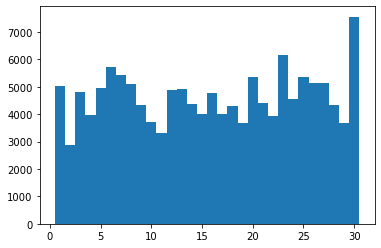

In [42]:
x = bikeShare['Day']
plt.hist(x, bins = 30, align = 'left')
plt.show()

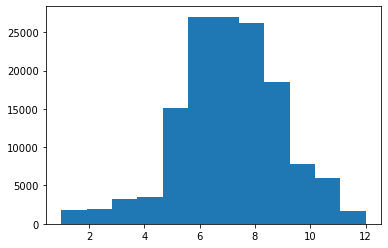

In [43]:
x = bikeShare['Month']
plt.hist(x, bins = 12)
plt.show()
#most popular months for rides are May - September

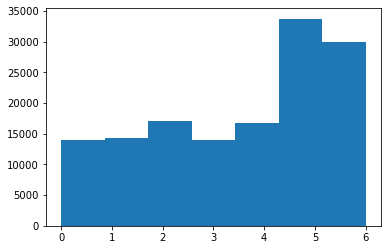

In [44]:
x = bikeShare['Day of Week']
plt.hist(x, bins = 7)
plt.show()
#most popular days of the week for rides are Saturday and Sunday

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


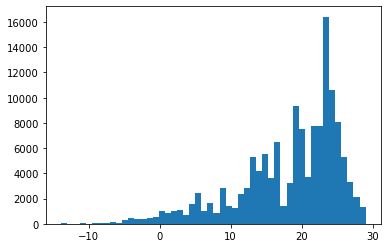

In [45]:
x = bikeShare['Mean Temp (°C)']
plt.hist(x, bins = 50, align = 'left')
plt.show()
#most popular temperatures for rides are 24-25 degrees Celsius)

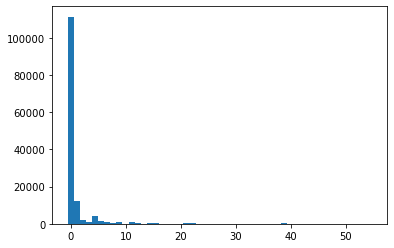

In [46]:
x = bikeShare['Total Precip (mm)']
plt.hist(x, bins = 50, align = 'left')
plt.show()
#as expected, most rides are taken on days when there is 0mm of precipitation that day

In [47]:
print(bikeShare.dtypes)

Unnamed: 0              int64
Start Station Name     object
Ride Count              int64
New Start time         object
Day of Week             int64
Month                   int64
Day                     int64
Mean Temp (°C)        float64
Total Precip (mm)     float64
dtype: object


In [48]:
#convert start time to numeric
bikeShare['New Start time'] = bikeShare['New Start time'].replace(':', '', regex=True).astype(int)

In [49]:
print(bikeShare.dtypes)

Unnamed: 0              int64
Start Station Name     object
Ride Count              int64
New Start time          int64
Day of Week             int64
Month                   int64
Day                     int64
Mean Temp (°C)        float64
Total Precip (mm)     float64
dtype: object


In [50]:
bikeShare

,Unnamed: 0,Start Station Name,Ride Count,New Start time,Day of Week,Month,Day,Mean Temp (°C),Total Precip (mm)
0,0,HTO Park (Queens Quay W),1,10800,2,1,1,-0.1,0.2
1,1,HTO Park (Queens Quay W),2,82600,2,1,1,-0.1,0.2
2,2,HTO Park (Queens Quay W),2,82600,2,1,1,-0.1,0.2
3,3,York St / Queens Quay W,1,85700,2,1,1,-0.1,0.2
4,4,York St / Queens Quay W,1,85800,2,1,1,-0.1,0.2
...,...,...,...,...,...,...,...,...,...
139935,139935,Queens Quay E / Lower Sherbourne St,1,195000,3,12,31,0.7,0.0
139936,139936,York St / Queens Quay W,1,205600,3,12,31,0.7,0.0
139937,139937,York St / Queens Quay W,1,220500,3,12,31,0.7,0.0
139938,139938,York St / Queens Quay W,2,222300,3,12,31,0.7,0.0


In [51]:
#one hot encoding for Start Station
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

In [52]:
data = asarray([['Lake Shore Blvd W / Ontario Dr'], ['Marilyn Bell Park Tennis Court'], ['HTO Park (Queens Quay W)'], ['York St / Queens Quay W']])
encoder = OneHotEncoder(sparse=False)
memType = encoder.fit_transform(data)

In [53]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [54]:
df = encode_and_bind(bikeShare, 'Start Station Name')

In [55]:
df['Start Station Name_HTO Park (Queens Quay W)'] = df['Start Station Name_HTO Park (Queens Quay W)'].astype(int)
df['Start Station Name_Lake Shore Blvd W / Ontario Dr'] = df['Start Station Name_Lake Shore Blvd W / Ontario Dr'].astype(int)
df['Start Station Name_Marilyn Bell Park Tennis Court'] = df['Start Station Name_Marilyn Bell Park Tennis Court'].astype(int)
df['Start Station Name_Queens Quay E / Lower Sherbourne St'] = df['Start Station Name_Queens Quay E / Lower Sherbourne St'].astype(int)
df['Start Station Name_York St / Queens Quay W'] = df['Start Station Name_York St / Queens Quay W'].astype(int)
df['Total Precip (mm)'] = df['Total Precip (mm)'].astype(float)
df['Mean Temp (°C)'] = df['Mean Temp (°C)'].astype(float)

In [56]:
bikeShare = df

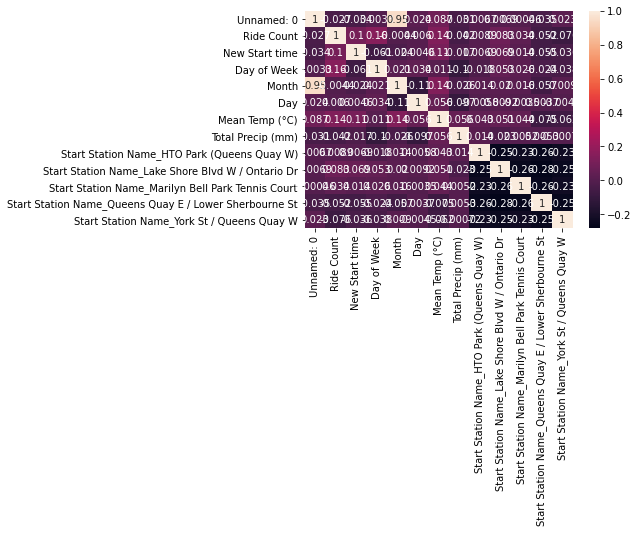

In [57]:
#examine correlation between variables
df = pd.DataFrame(bikeShare)

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

In [58]:
#no longer need original start station name column - drop column
df = df.drop(['Start Station Name'], axis = 1)

In [59]:
df

,Unnamed: 0,Ride Count,New Start time,Day of Week,Month,Day,Mean Temp (°C),Total Precip (mm),Start Station Name_HTO Park (Queens Quay W),Start Station Name_Lake Shore Blvd W / Ontario Dr,Start Station Name_Marilyn Bell Park Tennis Court,Start Station Name_Queens Quay E / Lower Sherbourne St,Start Station Name_York St / Queens Quay W
0,0,1,10800,2,1,1,-0.1,0.2,1,0,0,0,0
1,1,2,82600,2,1,1,-0.1,0.2,1,0,0,0,0
2,2,2,82600,2,1,1,-0.1,0.2,1,0,0,0,0
3,3,1,85700,2,1,1,-0.1,0.2,0,0,0,0,1
4,4,1,85800,2,1,1,-0.1,0.2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139935,139935,1,195000,3,12,31,0.7,0.0,0,0,0,1,0
139936,139936,1,205600,3,12,31,0.7,0.0,0,0,0,0,1
139937,139937,1,220500,3,12,31,0.7,0.0,0,0,0,0,1
139938,139938,2,222300,3,12,31,0.7,0.0,0,0,0,0,1


In [60]:
df.isnull().sum()

Unnamed: 0                                                   0
Ride Count                                                   0
New Start time                                               0
Day of Week                                                  0
Month                                                        0
Day                                                          0
Mean Temp (°C)                                            1014
Total Precip (mm)                                         1014
Start Station Name_HTO Park (Queens Quay W)                  0
Start Station Name_Lake Shore Blvd W / Ontario Dr            0
Start Station Name_Marilyn Bell Park Tennis Court            0
Start Station Name_Queens Quay E / Lower Sherbourne St       0
Start Station Name_York St / Queens Quay W                   0
dtype: int64

In [61]:
df.dropna(axis='rows', how='any', inplace=True)

In [62]:
df.isnull().sum()

Unnamed: 0                                                0
Ride Count                                                0
New Start time                                            0
Day of Week                                               0
Month                                                     0
Day                                                       0
Mean Temp (°C)                                            0
Total Precip (mm)                                         0
Start Station Name_HTO Park (Queens Quay W)               0
Start Station Name_Lake Shore Blvd W / Ontario Dr         0
Start Station Name_Marilyn Bell Park Tennis Court         0
Start Station Name_Queens Quay E / Lower Sherbourne St    0
Start Station Name_York St / Queens Quay W                0
dtype: int64

In [63]:
df.to_csv('bikeshare2020model.csv')

In [64]:
#Model 1: Random Forest 
from sklearn.ensemble import RandomForestRegressor

In [65]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [66]:
#set features and targets 
labels = np.array(df['Ride Count'])

In [67]:
features= df.drop('Ride Count', axis = 1, inplace=True)

In [68]:
feature_list = list(df.columns)

In [69]:
features = np.array(df)

In [70]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split

In [71]:
training_features, testing_features, training_labels, testing_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [72]:
print('Training Features Shape:', training_features.shape)
print('Training Labels Shape:', training_labels.shape)
print('Testing Features Shape:', testing_features.shape)
print('Testing Labels Shape:', testing_labels.shape)

Training Features Shape: (104194, 12)
Training Labels Shape: (104194,)
Testing Features Shape: (34732, 12)
Testing Labels Shape: (34732,)


In [73]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 25)

In [74]:
rf.fit(training_features, training_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=25, verbose=0, warm_start=False)

In [75]:
# Use the predict method on the test data and calculate the absolute errors
predictions = rf.predict(testing_features)
errors = abs(predictions - testing_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rides.')

Mean Absolute Error: 0.4 rides.


In [76]:
# Calculate mean absolute percentage error (MAPE) and accuracy
mape = 100 * (errors / testing_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 69.16 %.


In [84]:
df = pd.read_csv('bikeshare2020model.csv')

In [85]:
#Model 2: Linear Regression
from sklearn import linear_model

In [86]:
X = df[['New Start time', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Start Station Name_HTO Park (Queens Quay W)', 'Start Station Name_Lake Shore Blvd W / Ontario Dr', 'Start Station Name_Marilyn Bell Park Tennis Court', 'Start Station Name_Queens Quay E / Lower Sherbourne St', 'Start Station Name_York St / Queens Quay W']]

In [87]:
y = df['Ride Count']

In [88]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
print(regr.coef_)

[ 1.90715429e-06  7.28227684e-02 -1.16057981e-02 -8.18585973e-04
  1.52187884e-02  1.04460927e-02  1.11425193e-01  4.78047361e-02
 -5.84144280e-02 -1.11261593e-01]
